<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>

<h1> Extracting and Visualizing Stock Data</h1>


<h1> Description</h1>


In this task, I obtained some data using Web Scraping, some of this data was visualized using plots.

# Workflow
 1. Extracting Tesla Stock Data Using yfinance
 2. Extracting Tesla Revenue Data Using Webscraping
 3. Extracting GameStop Stock Data Using yfinance
 4. Extracting GameStop Revenue Data Using Webscraping
 5. Tesla Stock and Revenue Dashboard 
 6. GameStop Stock and Revenue Dashboard    

In [ ]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
import matplotlib.pyplot as plt
import plotly.express as px
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Question 1 - Extracting Tesla Stock Data Using yfinance 

In [5]:
tsla = yf.Ticker('TSLA')

In [6]:
tsla_data = tsla.history(period = 'max')

In [8]:
tsla_data.reset_index(inplace=True)
tsla_data.head (5)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [12]:
html_data = requests.get(url)

In [13]:
soup = BeautifulSoup(html_data.text,'html.parser')

tables = soup.find_all('table')
tesla_revenue = tables[1]
rows = tesla_revenue.find_all('tr')

data = []
for row in rows:
    headers = row.find_all('th')
    if headers:
        header = [column.get_text(strip = True) for column in headers]
    else:
        columns = row.find_all('td')
        data.append([column.get_text(strip = True) for column in columns])
tesla_revenue = pd.DataFrame(data, columns = ['Date','Revenue'])
tesla_revenue.head(10)

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [16]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].astype(str).str.replace(',|\$',"",regex = True)
tesla_revenue.head(5)

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [17]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [18]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


# Question 3 - Extracting GameStop Stock Data Using yfinance 

In [26]:
gme = yf.Ticker('GME')

In [29]:
gme_data = gme.history(period = 'max')
gme_data.reset_index(inplace = True)

In [30]:
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping 

In [33]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [34]:
html_data_2 = requests.get(url).text

In [35]:
soup = BeautifulSoup(html_data_2,'html.parser')

tables = soup.find_all('table')
table = tables[1]

data = []
rows = table.find_all('tr')
for row in rows:
    header = table.find('th') 
    columns = row.find_all('td')
    if columns:
        data.append([column.text for column in columns])
        gme_revenue = pd.DataFrame(data, columns = ['Date','Revenue']).iloc[1:,:]
gme_revenue.head(5)

,Date,Revenue
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
5,2019-01-31,"$3,063"


In [36]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].astype(str).str.replace(',|\$',"",regex = True)

In [37]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


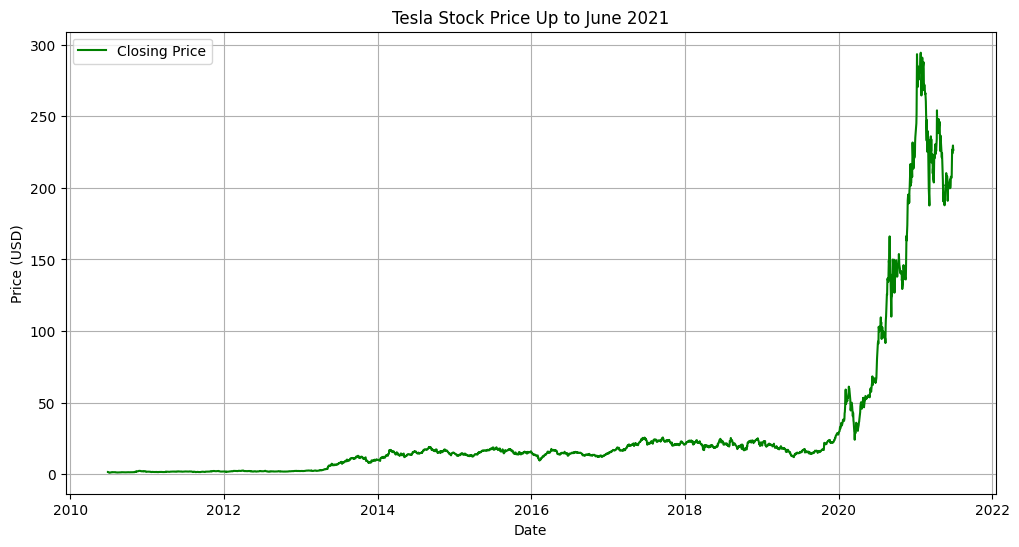

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract stock information and save it in a DataFrame
tesla_data = tesla_ticker.history(period="max")

# Reset the index to have 'Date' as a column
tesla_data.reset_index(inplace=True)

# Filter data up to June 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(tesla_data_filtered, title='Tesla Stock Price Up to June 2021')

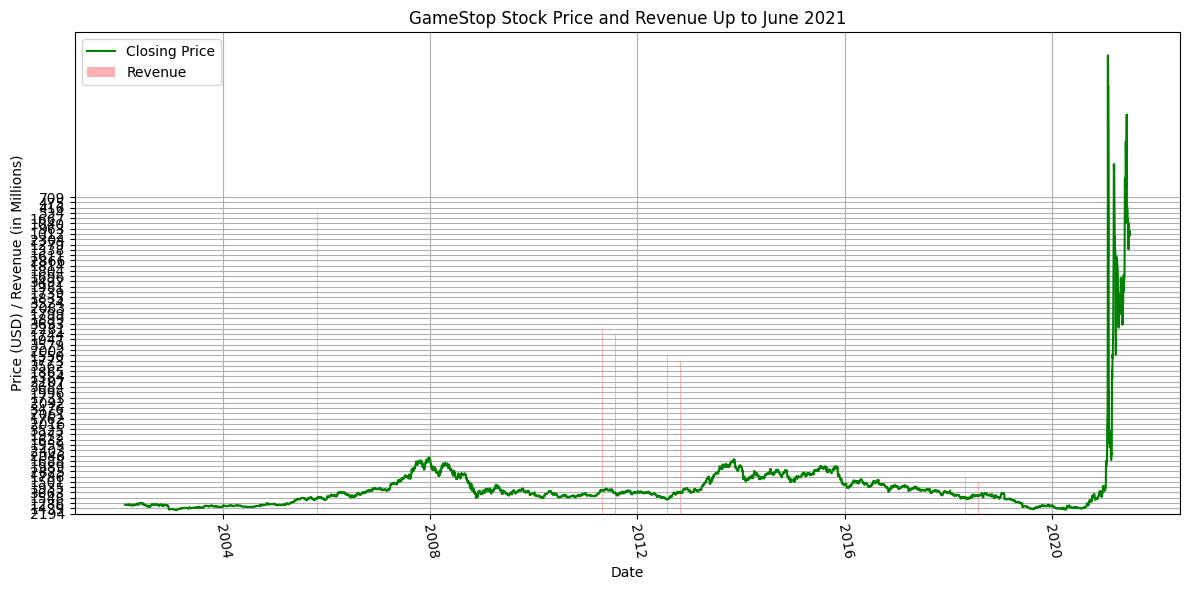

In [46]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))
    
    # Plot stock closing price
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='green')
    
    # Plot revenue as a bar chart
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], alpha=0.3, label='Revenue', color='red')
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD) / Revenue (in Millions)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=1000)
    plt.tight_layout()
    plt.show()

# Create a ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")

# Extract stock information and save it in a DataFrame
gme_data = gamestop_ticker.history(period="max")

# Reset the index to have 'Date' as a column
gme_data.reset_index(inplace=True)

# Filter data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# Assuming gme_revenue DataFrame is already created and contains 'Date' and 'Revenue'
# Filter gme_revenue to match the date range
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop Stock Price and Revenue Up to June 2021')